### Anuran Calls Dataset Clustering in Python

Korišćen dataset [Anuran Calls](https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29#) sadrži 7195 instanci, 22 MFCC atributa (Mel-frequency cepstral coeffieicents), atribute koji označavaju redom familiju, genus i species, kao i RecordID kolonu koju je potrebno izbaciti iz dataseta. 
Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [3]:
dataset = pd.read_csv('frogs.csv')
dataset

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


Dataset je nastao segmentiranjem 60 audio snimaka koje pripadaju 4 familija, 8 genusa i 10 različitih speciesa žaba. Familije koje su snimljene su Bufonidae (68), Dendrobatidae (542), Hylidae (2165) i Leptodactylidae (4420). Genusi kojima pripadaju žabe su Adenomera (4150), Ameerega (542), Dendropsophus (310), Hypsiboas (1593), Leptodactylus (270), Osteocephalus (114), Rhinella (68), Scinax (148). Za species su sledeće vrednosti AdenomeraAndre (672), AdenomeraHylaedactae (3478), Ameeregatrivittata (542), HylaMinuta (310), HypsiboasCinerascens (472), HypsiboasCordobae (1121), LeptodactylusFuscus (270), OsteocephalusOophae (114), Rhinellagranulosa (68), ScinaxRuber (148)

X promenljiva uzima vrednosti MFCCs iz dataseta, bez ID-ja, familije, genusa i species, ali i MFCCs_1 kolone, čija je vrednost uglavnom jednaka 1 i narušava konačne rezultate klasterizacije.

Podaci su prethodno normalizovani na opseg [-1, 1] i dataset nema podatke koji nedostaju.

In [103]:
X = dataset.iloc[:, 1:22].values 
labels = dataset[['Family', 'Genus', 'Species']]
labels

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


### K-Means algoritam
K-Means algoritam zahteva da unapred znamo broj klastera, pa moramo upotrebiti Elbow metodu kako bismo došli do određenog predloga. Nakon toga za zadati broj klastera biraju se centroidi i definišu klasteri oko njih.

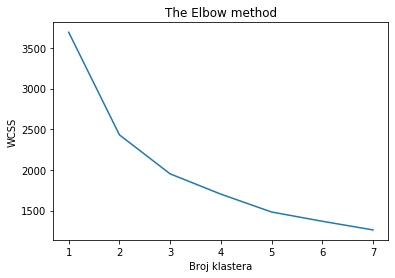

In [43]:
c = 8
from sklearn.cluster import KMeans
wcss = []
for i in range(1, c):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, n_jobs=-1)
    km.fit(X)    
    wcss.append(km.inertia_)
plt.plot(range(1, c), wcss)
plt.title('The Elbow method')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

Elbow metodom dobijamo predlog za broj klastera n = 3. 

PCA (Principal component analysis) je jedna od metoda za smanjivanje dimenzionalnosti prostora. Ona koristi Singular Value Decomposition i linearno smanjuje dimenzionalnost.

In [44]:
# PCA redukovanje dimenzionalnosti
p = 4
from sklearn.decomposition import PCA
pca = PCA(n_components = p) 
data = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.39251507 0.21375379 0.10170907 0.06559154]


In [64]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, n_jobs=-1)
y_kmeans = kmeans.fit_predict(X)

Vizuelizacija podataka sa 3 i 4 klastera.

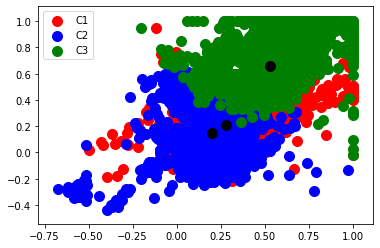

<Figure size 432x288 with 0 Axes>

In [65]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.legend()
fig = plt.figure()

In [66]:
bufonidae = dataset[dataset['Family'] == 'Bufonidae'] 
dendrobatidae = dataset[dataset['Family'] == 'Dendroatidae']
hylidae = dataset[dataset['Family'] == 'Hylidae']
leptodactylidae = dataset[dataset['Family'] == 'Leptodactylidae']

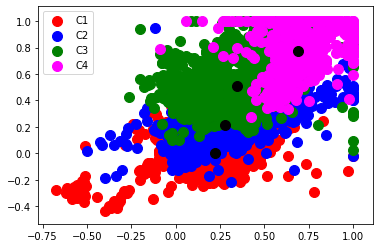

<Figure size 432x288 with 0 Axes>

In [67]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, n_jobs=-1)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'C4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.legend()
fig = plt.figure()

### Hijerarhijski algoritam
Predstavljaju sttrukturu stabla, koren je skup svih uzoraka (početni klaster), a listovi stabla predstavljaju svaki uzorak ponaosob. Agglomerative Clustering koristi bottom-up pristup, što znači da svako zapažanje započinje u svom klasteru, a klasteri se sukcesivno spajaju do korena. Kod ove metode ukoliko je vrednost linkage parametra jednaka 'ward', prihvata se samo euklidski način (affinity). 

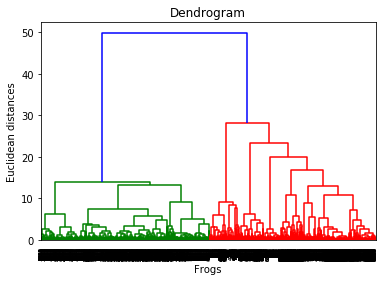

In [56]:
# Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,metric='euclidean',method='ward'))
plt.title("Dendrogram")
plt.xlabel("Frogs")
plt.ylabel("Euclidean distances")
plt.show()

Dendrogram je alternativa Elbow metodi i na osnovu vizuelnog prikaza možemo zaključiti da je optimalan broj klastera 3.

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

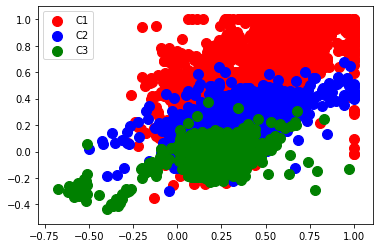

<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'C3')
plt.legend()
fig = plt.figure()

Ukoliko nisu poznate vrednosti odnosno labele za proveru rezultata, za evaluaciju rada algoritama mogu se koristiti Silhouette score, Calinski-Harabasz Index i Davies-Bouldin Index. Ovakve evaluacije koriste sam model kako bi dale koeficijent procene uspešnosti.
Silhouette score je u opsegu od -1 do 1, što je veći klasteri su gušći i bolje razdvojeni.
Slično njemu Calinski Harabasz skor je veći sa većom gustinom i dobrom razdvojenošću među klasterima.
Dok je Davies Bouldin skor poželjno da bude što niži. On označava prosečnu sličnost između klastera, najmanji mogući skor je 0.

In [85]:
labels = kmeans.labels_
hc_labels = hc.labels_
print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(metrics.silhouette_score(X, hc_labels, metric='euclidean'))

0.379672463802298
0.37012145873734864


In [87]:
print(metrics.calinski_harabasz_score(X, labels))
print(metrics.calinski_harabasz_score(X, hc_labels))

2802.25718524134
2883.506228855839


In [86]:
print(metrics.davies_bouldin_score(X, labels))
print(metrics.davies_bouldin_score(X, hc_labels))

1.371366622583719
1.2800680775662312
